In [56]:
#libraries
import pandas as pd
import numpy
#for continous variables, histogram and boxplot
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
df = pd.read_csv("C:/Users/mizni/Downloads/Train (1).csv")
df.head

<bound method NDFrame.head of                           ID  customer_id country_id  tbl_loan_id  lender_id  \
0      ID_266671248032267278       266671      Kenya       248032     267278   
1      ID_248919228515267278       248919      Kenya       228515     267278   
2      ID_308486370501251804       308486      Kenya       370501     251804   
3      ID_266004285009267278       266004      Kenya       285009     267278   
4      ID_253803305312267278       253803      Kenya       305312     267278   
...                      ...          ...        ...          ...        ...   
68649  ID_244559228408267278       244559      Kenya       228408     267278   
68650  ID_260062217784267278       260062      Kenya       217784     267278   
68651  ID_259137216701267278       259137      Kenya       216701     267278   
68652  ID_266801303201267278       266801      Kenya       303201     267278   
68653  ID_249117268933267278       249117      Kenya       268933     267278   

      loa

In [58]:
#preparing the data, check for missing data, duplicate and format
df.isnull().sum()

ID                             0
customer_id                    0
country_id                     0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
target                         0
dtype: int64

In [59]:
#checking for duplicate data
df.duplicated().sum()

0

In [60]:
#the data type
df.dtypes

ID                              object
customer_id                      int64
country_id                      object
tbl_loan_id                      int64
lender_id                        int64
loan_type                       object
Total_Amount                   float64
Total_Amount_to_Repay          float64
disbursement_date               object
due_date                        object
duration                         int64
New_versus_Repeat               object
Amount_Funded_By_Lender        float64
Lender_portion_Funded          float64
Lender_portion_to_be_repaid    float64
target                           int64
dtype: object

In [61]:
#formating the dataset
df['New_versus_Repeat'] = df['New_versus_Repeat'].astype(str)
df.due_date = pd.to_datetime(df.due_date)
df.disbursement_date = pd.to_datetime(df.disbursement_date)
df['loan_type'] = df['loan_type'].astype(str)
df[['ID' , 'customer_id', 'country_id' , 'tbl_loan_id', 'lender_id']] = df[['ID' , 'customer_id', 'country_id' , 'tbl_loan_id', 'lender_id']].astype(str)

In [62]:
#checking the formatted code
df.dtypes

ID                                     object
customer_id                            object
country_id                             object
tbl_loan_id                            object
lender_id                              object
loan_type                              object
Total_Amount                          float64
Total_Amount_to_Repay                 float64
disbursement_date              datetime64[ns]
due_date                       datetime64[ns]
duration                                int64
New_versus_Repeat                      object
Amount_Funded_By_Lender               float64
Lender_portion_Funded                 float64
Lender_portion_to_be_repaid           float64
target                                  int64
dtype: object

In [63]:
#checking the top 5
df.head(n=10)

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0
5,ID_265607284433267278,265607,Kenya,284433,267278,Type_1,4325.0,4325.0,2022-10-19,2022-10-26,7,Repeat Loan,1297.50,0.300000,1298.0,0
6,ID_261844305920267278,261844,Kenya,305920,267278,Type_1,6735.0,6735.0,2022-11-29,2022-12-06,7,Repeat Loan,2020.50,0.300000,2021.0,0
7,ID_265488287698267278,265488,Kenya,287698,267278,Type_1,1540.0,1562.0,2022-10-25,2022-11-01,7,Repeat Loan,462.00,0.300000,469.0,0
8,ID_268010279432267278,268010,Kenya,279432,267278,Type_1,21496.0,21994.0,2022-10-11,2022-10-18,7,Repeat Loan,0.00,0.000000,0.0,0
9,ID_245399236898267278,245399,Kenya,236898,267278,Type_1,18852.0,18852.0,2022-08-15,2022-08-22,7,Repeat Loan,5655.60,0.300000,5656.0,0


In [64]:
#statistics part
df.describe()

,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
count,6.865400e+04,6.865400e+04,68654.000000,6.865400e+04,68654.000000,6.865400e+04,68654.000000
mean,1.483683e+04,1.563993e+04,8.544586,2.545663e+03,0.218679,2.652621e+03,0.018324
std,1.416499e+05,1.650784e+05,13.343145,1.192272e+04,0.129832,1.338006e+04,0.134120
min,2.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.295000e+03,2.329000e+03,7.000000,2.340000e+02,0.118712,2.390000e+02,0.000000
50%,5.249000e+03,5.325000e+03,7.000000,9.150000e+02,0.300000,9.340000e+02,0.000000
75%,1.145000e+04,1.165000e+04,7.000000,2.272650e+03,0.300000,2.317000e+03,0.000000
max,2.300000e+07,2.541500e+07,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000


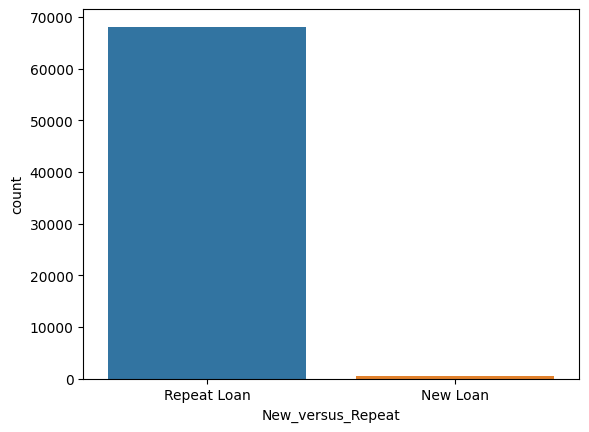

In [65]:
#univariate analysis
#frequency of new versus report distribution
sns.countplot(x = df['New_versus_Repeat']);

In [66]:
#frequency of New_versus_repeat distribution
df['New_versus_Repeat'].value_counts()

Repeat Loan    68087
New Loan         567
Name: New_versus_Repeat, dtype: int64

In [67]:
#frequency of target distribution
df['target'].value_counts()

0    67396
1     1258
Name: target, dtype: int64

In [68]:
#test data
df_test = pd.read_csv("C:/Users/mizni/Downloads/Test (1).csv")
df_test.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


In [69]:
df_test.isnull().sum()

ID                             0
customer_id                    0
country_id                     0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
dtype: int64

In [70]:
#feature engineering 
#separate train row
df_row= df.shape[0]

#separate test row
df_test_row = df_test.shape[0]

#merge both train & test rows together
all_data = pd.concat((df, df_test)).reset_index(drop=True)

In [71]:
all_data.shape

(87248, 16)

In [72]:
all_data.columns

Index(['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',
       'loan_type', 'Total_Amount', 'Total_Amount_to_Repay',
       'disbursement_date', 'due_date', 'duration', 'New_versus_Repeat',
       'Amount_Funded_By_Lender', 'Lender_portion_Funded',
       'Lender_portion_to_be_repaid', 'target'],
      dtype='object')

In [73]:
all_data.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30 00:00:00,2022-09-06 00:00:00,7,Repeat Loan,120.85,0.014305,121.0,0.0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30 00:00:00,2022-08-06 00:00:00,7,Repeat Loan,7768.50,0.300000,7794.0,0.0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06 00:00:00,2024-09-13 00:00:00,7,Repeat Loan,1380.00,0.200000,1428.0,0.0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20 00:00:00,2022-10-27 00:00:00,7,Repeat Loan,2687.40,0.300000,2770.0,0.0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28 00:00:00,2022-12-05 00:00:00,7,Repeat Loan,1369.20,0.300000,1418.0,0.0


In [74]:
#select 2 columns only
all_data[['disbursement_date', 'duration']]

,disbursement_date,duration
0,2022-08-30 00:00:00,7
1,2022-07-30 00:00:00,7
2,2024-09-06 00:00:00,7
3,2022-10-20 00:00:00,7
4,2022-11-28 00:00:00,7
...,...,...
87243,2023-02-09,7
87244,2022-08-04,7
87245,2022-06-23,7
87246,2022-08-23,7


In [75]:
#a variable name to_drop stores all columns to drop
to_drop =['tbl_loan_id','lender_id','loan_type',
          'Lender_portion_Funded', 'Lender_portion_to_be_repaid',
          'disbursement_date','due_date','customer_id', 'country_id']

#drop all columns stored in to_drop variable
all_data =all_data.drop(to_drop, axis=1)

In [76]:
all_data.columns

Index(['ID', 'Total_Amount', 'Total_Amount_to_Repay', 'duration',
       'New_versus_Repeat', 'Amount_Funded_By_Lender', 'target'],
      dtype='object')

In [77]:
#get_dummies() - a function that encode categorical data types to numerical data types
#encode categorical variable to numerical variable
all_data =pd.get_dummies(data = all_data, columns=['New_versus_Repeat'], drop_first=True)

In [78]:
#extract the train set record back
train = all_data[:df_row]

#extract the test set record back
test = all_data[df_row:]

In [79]:
train.dtypes

ID                                object
Total_Amount                     float64
Total_Amount_to_Repay            float64
duration                           int64
Amount_Funded_By_Lender          float64
target                           float64
New_versus_Repeat_Repeat Loan      uint8
dtype: object

In [80]:
test.head()

,ID,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,target,New_versus_Repeat_Repeat Loan
68654,ID_269404226088267278,1919.0,1989.0,7,575.7,NaN,1
68655,ID_255356300042267278,2138.0,2153.0,7,0.0,NaN,1
68656,ID_257026243764267278,8254.0,8304.0,7,207.0,NaN,1
68657,ID_264617299409267278,3379.0,3379.0,7,1013.7,NaN,1
68658,ID_247613296713267278,120.0,120.0,7,36.0,NaN,1


In [81]:
train.head()

,ID,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,target,New_versus_Repeat_Repeat Loan
0,ID_266671248032267278,8448.0,8448.0,7,120.85,0.0,1
1,ID_248919228515267278,25895.0,25979.0,7,7768.50,0.0,1
2,ID_308486370501251804,6900.0,7142.0,7,1380.00,0.0,1
3,ID_266004285009267278,8958.0,9233.0,7,2687.40,0.0,1
4,ID_253803305312267278,4564.0,4728.0,7,1369.20,0.0,1


In [82]:
#store actual test result in target
new_target = test['target']

#drop actual test result in target 
test = test.drop('target', axis=1)

In [84]:
#test real values
new_target.value_counts()

Series([], Name: target, dtype: int64)